In [5]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('data_Morgan_1.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Activity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df2 = pd.read_csv('rdkit_descriptors_208_with_activity.csv')
df2.drop('Activity', axis = 1, inplace = True)
df2.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.607685,-1.275102,14.607685,0.137208,0.893230,331.347,313.203,331.133220,126,0,...,0,0,0,0,0,0,0,0,0,0
1,10.427986,-0.635752,10.427986,0.196415,0.384874,325.737,317.673,325.003638,108,0,...,0,0,0,0,0,0,0,0,0,0
2,10.505713,-0.632032,10.505713,0.204419,0.353751,350.356,336.244,350.068491,126,0,...,0,0,0,0,0,0,0,0,0,0
3,10.420390,-0.618689,10.420390,0.256214,0.388807,290.304,280.224,290.047361,102,0,...,0,0,0,0,0,0,0,0,0,0
4,10.461498,-0.631261,10.461498,0.201693,0.319099,449.084,442.028,446.863634,114,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df = pd.concat([df, df2], axis = 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(23791, 2257)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(23684, 2257)

In [12]:
# Get columns with null values
null_columns = df.columns[df.isnull().any()].tolist()

# Print the columns with null values
print("Columns with null values:", null_columns)

for i in null_columns:
    print(df[i].isnull().mean()*100)

Columns with null values: []


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Display the shape and summary of the DataFrame before dropping missing values
print(f'Shape before dropping NaN values: {df.shape}')
print(df.describe())

# Drop rows with missing values
df.dropna(inplace=True)
print(f'Shape after dropping NaN values: {df.shape}')

# Prepare features and target variable
X = df.drop(['Activity'], axis=1)
y = df['Activity']
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

# Scale the features to be between 0 and 1
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Print the statistics of X after scaling
print("Statistics of X after Min-Max scaling (0 to 1):")
print(X_scaled.describe())

# Include target variable and update df
df = X_scaled.copy()
df['Activity'] = y.reset_index(drop=True)

# Display the updated DataFrame
print("Updated DataFrame with scaled features and activity:")
print(df.head())


Shape before dropping NaN values: (23684, 2257)
                  0             1             2             3             4  \
count  23684.000000  23684.000000  23684.000000  23684.000000  23684.000000   
mean       0.005784      0.164795      0.048978      0.009458      0.010556   
std        0.075837      0.371003      0.215827      0.096793      0.102199   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  \
count  23684.000000  23684.000000  23684.000000  23684.000000  23684.000000   
mean       0.028880      0.008613      0.006713      0.021660      0.011949   
std

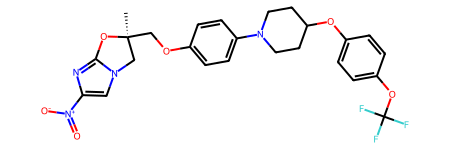

In [14]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
m = Chem.MolFromSmiles('C[C@@]1(CN2C=C(N=C2O1)[N+](=O)[O-])COC3=CC=C(C=C3)N4CCC(CC4)OC5=CC=C(C=C5)OC(F)(F)F')
m

In [15]:
bit={}
morganfp=AllChem.GetMorganFingerprintAsBitVect(m,useChirality=True, radius=5, nBits = 2048, bitInfo=bit)

[16:59:06] DEPRECATION WARNING: please use MorganGenerator


In [17]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

# Convert SMILES to RDKit molecule
smiles = 'C[C@@]1(CN2C=C(N=C2O1)[N+](=O)[O-])COC3=CC=C(C=C3)N4CCC(CC4)OC5=CC=C(C=C5)OC(F)(F)F'
m = Chem.MolFromSmiles(smiles)

# Initialize a dictionary for bit information
bit_info = {}

# Generate the Morgan fingerprint with specified parameters
radius = 5
nBits = 2048
morganfp = AllChem.GetMorganFingerprintAsBitVect(m, useChirality=True, radius=radius, nBits=nBits, bitInfo=bit_info)

# Convert the fingerprint to a NumPy array
mfpvector = np.zeros((morganfp.GetNumBits(),), dtype=int)
for i in range(morganfp.GetNumBits()):
    mfpvector[i] = morganfp.GetBit(i)

# Print non-zero indices (bits set to 1)
print("Non-zero bit indices:", np.nonzero(mfpvector)[0])



Non-zero bit indices: [   2   26   39   40   43   80  101  102  107  114  119  139  142  145
  150  158  208  233  308  317  322  335  337  372  378  390  404  407
  441  449  464  494  524  525  530  548  580  602  650  656  661  668
  687  695  715  718  747  753  772  773  824  838  845  862  866  880
  888  894  926  935  959  961  975  988 1003 1019 1046 1057 1060 1065
 1121 1126 1128 1133 1149 1195 1242 1261 1272 1274 1282 1289 1310 1325
 1349 1380 1405 1409 1440 1445 1452 1453 1457 1467 1480 1484 1497 1535
 1597 1645 1715 1732 1749 1750 1762 1774 1790 1794 1825 1842 1855 1873
 1928 1942 1952 1953 1963 1976 1977 1980 1988 2014]


[16:59:25] DEPRECATION WARNING: please use MorganGenerator


In [20]:
# Required libraries: rdkit, xgboost, scikit-learn, pandas
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Step 1: Generate molecular descriptors for Delamanid
delamanid_smiles = "C[C@@]1(CN2C=C(N=C2O1)[N+](=O)[O-])COC3=CC=C(C=C3)N4CCC(CC4)OC5=CC=C(C=C5)OC(F)(F)F"
delamanid_molecule = Chem.MolFromSmiles(delamanid_smiles)

# List of molecular descriptors from RDKit
descriptor_names = [desc[0] for desc in Descriptors.descList]

# Compute descriptors for the Delamanid molecule
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
delamanid_descriptors = calculator.CalcDescriptors(delamanid_molecule)

# Step 2: Generate the Morgan fingerprint (2048 bits) for Delamanid
morgan_fingerprint = GetMorganFingerprintAsBitVect(delamanid_molecule, radius=2, nBits=2048)
delamanid_fp_array = list(morgan_fingerprint)

# Combine molecular descriptors and Morgan fingerprint into one feature vector
combined_features = list(delamanid_descriptors) + delamanid_fp_array

# Create a DataFrame with descriptor names and Morgan fingerprint bits
morgan_bit_names = [str(i) for i in range(2048)]  # Simple numeric format for Morgan bits
combined_feature_names = descriptor_names + morgan_bit_names

# Create a DataFrame for Delamanid
delamanid_df = pd.DataFrame([combined_features], columns=combined_feature_names)

# Step 3: Load your dataset
# Assuming `df` is your dataset with molecular descriptors and target labels (Activity)
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your dataset

# For demonstration, assume `df` is defined with relevant features and 'Activity' as the target


X = df.drop('Activity', axis=1)
y = df['Activity']

# Step 4: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the best parameters for the XGBoost model
best_params = {
    'max_depth': 12,
    'n_estimators': 207,
    'scale_pos_weight': 2.2233911067827616,
    'random_state': 42
}

# Step 6: Initialize and train the XGBoost model
model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)

# Step 7: Feature importance analysis from the XGBoost model
importance = model.feature_importances_  # Get feature importances

# Convert to a DataFrame for better visualization and manipulation
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Non-zero bit indices from the Morgan fingerprint (you can customize this as needed)
non_zero_bit_indices = [
    2, 26, 39, 40, 43, 80, 101, 102, 107, 114, 119, 139, 142, 145, 150, 158, 208, 233, 308, 317, 322, 335, 337, 372, 378, 390, 404, 407, 441, 449, 464, 494, 524, 525, 530, 548, 580, 602, 650, 656, 661, 668, 687, 695, 715, 718, 747, 753, 772, 773, 824, 838, 845, 862, 866, 880, 888, 894, 926, 935, 959, 961, 975, 988, 1003, 1019, 1046, 1057, 1060, 1065, 1121, 1126, 1128, 1133, 1149, 1195, 1242, 1261, 1272, 1274, 1282, 1289, 1310, 1325, 1349, 1380, 1405, 1409, 1440, 1445, 1452, 1453, 1457, 1467, 1480, 1484, 1497, 1535, 1597, 1645, 1715, 1732, 1749, 1750, 1762, 1774, 1790, 1794, 1825, 1842, 1855, 1873, 1928, 1942, 1952, 1953, 1963, 1976, 1977, 1980, 1988, 2014

]

# Step 8: Filter for only the important features
important_feature_names = importance_df['Feature'].head(500).values  # Get the top important feature names

# Create a list to store features that match with the non-zero bit indices
matching_features = [name for idx, name in enumerate(X.columns) if idx in non_zero_bit_indices and name in important_feature_names]

# Filter importance_df for matching features only
matching_importance_df = importance_df[importance_df['Feature'].isin(matching_features)]
print("\nFeature Importances of Matching Features:")
print(matching_importance_df)

# Create a new DataFrame for Delamanid with only the important matching features
delamanid_important_features = delamanid_df[matching_features]

print("\nFiltered Delamanid DataFrame with Important Features:")
print(delamanid_important_features)


[17:02:21] DEPRECATION WARNING: please use MorganGenerator
[17:02:21] DEPRECATION WARNING: please use MorganGenerator
[17:02:21] DEPRECATION WARNING: please use MorganGenerator
[17:02:21] DEPRECATION WARNING: please use MorganGenerator



Feature Importances of Matching Features:
     Feature  Importance
530      530    0.012227
317      317    0.006256
1928    1928    0.006140
43        43    0.004239
1019    1019    0.003380
1762    1762    0.003346
650      650    0.003146
1980    1980    0.002973
1794    1794    0.002839
378      378    0.001586
888      888    0.001549
1953    1953    0.001502
1825    1825    0.001452
114      114    0.001130
1349    1349    0.001022
1126    1126    0.000956
26        26    0.000931
1046    1046    0.000847
150      150    0.000822
1060    1060    0.000746
1405    1405    0.000718
1452    1452    0.000715
441      441    0.000621
1409    1409    0.000605
102      102    0.000578
1440    1440    0.000575
687      687    0.000563
1274    1274    0.000554
656      656    0.000544
322      322    0.000519
935      935    0.000518
715      715    0.000505
337      337    0.000504

Filtered Delamanid DataFrame with Important Features:
   26  43  102  114  150  317  322  337  378  441  .

[17:06:06] DEPRECATION WARNING: please use MorganGenerator
[17:06:06] DEPRECATION WARNING: please use MorganGenerator
[17:06:06] DEPRECATION WARNING: please use MorganGenerator
[17:06:06] DEPRECATION WARNING: please use MorganGenerator



Feature Importances of Matching Features:
     Feature  Importance
530      530    0.012227
317      317    0.006256
1928    1928    0.006140
43        43    0.004239
1019    1019    0.003380
1762    1762    0.003346
650      650    0.003146
1980    1980    0.002973
1794    1794    0.002839
378      378    0.001586
888      888    0.001549
1953    1953    0.001502
1825    1825    0.001452
114      114    0.001130
1349    1349    0.001022
1126    1126    0.000956
26        26    0.000931
1046    1046    0.000847
150      150    0.000822
1060    1060    0.000746
1405    1405    0.000718
1452    1452    0.000715
441      441    0.000621
1409    1409    0.000605
102      102    0.000578
1440    1440    0.000575
687      687    0.000563
1274    1274    0.000554
656      656    0.000544
322      322    0.000519
935      935    0.000518
715      715    0.000505
337      337    0.000504

Filtered Delamanid DataFrame with Important Features:
   26  43  102  114  150  317  322  337  378  441  .

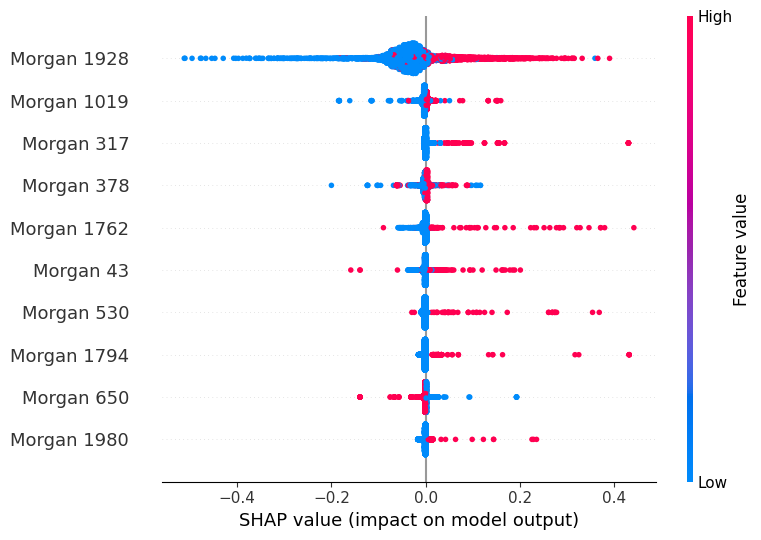

<Figure size 640x480 with 0 Axes>

Top 10 Important Features:
   Feature  Importance
0      530    0.012227
1      317    0.006256
2     1928    0.006140
3       43    0.004239
4     1019    0.003380
5     1762    0.003346
6      650    0.003146
7     1980    0.002973
8     1794    0.002839
9      378    0.001586


In [22]:
# Required libraries
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# Step 1: Generate molecular descriptors for Delamanid
delamanid_smiles = "C[C@@]1(CN2C=C(N=C2O1)[N+](=O)[O-])COC3=CC=C(C=C3)N4CCC(CC4)OC5=CC=C(C=C5)OC(F)(F)F"
delamanid_molecule = Chem.MolFromSmiles(delamanid_smiles)

# List of molecular descriptors from RDKit
descriptor_names = [desc[0] for desc in Descriptors.descList]

# Compute descriptors for the Delamanid molecule
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
delamanid_descriptors = calculator.CalcDescriptors(delamanid_molecule)

# Step 2: Generate the Morgan fingerprint (2048 bits) for Delamanid
delamanid_fingerprint = GetMorganFingerprintAsBitVect(delamanid_molecule, radius=2, nBits=2048)
delamanid_fp_array = list(delamanid_fingerprint)

# Combine molecular descriptors and Morgan fingerprint into one feature vector
combined_features = list(delamanid_descriptors) + delamanid_fp_array

# Create a DataFrame with descriptor names and Morgan fingerprint bits
morgan_bit_names = [str(i) for i in range(2048)]  # Simple numeric format for Morgan bits
combined_feature_names = descriptor_names + morgan_bit_names

# Create a DataFrame for Delamanid
delamanid_df = pd.DataFrame([combined_features], columns=combined_feature_names)

# Step 3: Load your dataset
# Assuming `df` is your dataset with molecular descriptors and target labels (Activity)
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your dataset

# For demonstration, assume `df` is defined with relevant features and 'Activity' as the target
X = df.drop('Activity', axis=1)
y = df['Activity']

# Step 4: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the best parameters for the XGBoost model
best_params = {
    'max_depth': 12,
    'n_estimators': 207,
    'scale_pos_weight': 2.2233911067827616,
    'random_state': 42
}

# Step 6: Initialize and train the XGBoost model
model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)

# Step 7: Feature importance analysis from the XGBoost model
importance = model.feature_importances_  # Get feature importances

# Convert to a DataFrame for better visualization and manipulation
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Non-zero bit indices from the Morgan fingerprint
non_zero_bit_indices = [
   2, 26, 39, 40, 43, 80, 101, 102, 107, 114, 119, 139, 142, 145, 150, 158, 208, 233, 308, 317, 322, 335, 337, 372, 378, 390, 404, 407, 441, 449, 464, 494, 524, 525, 530, 548, 580, 602, 650, 656, 661, 668, 687, 695, 715, 718, 747, 753, 772, 773, 824, 838, 845, 862, 866, 880, 888, 894, 926, 935, 959, 961, 975, 988, 1003, 1019, 1046, 1057, 1060, 1065, 1121, 1126, 1128, 1133, 1149, 1195, 1242, 1261, 1272, 1274, 1282, 1289, 1310, 1325, 1349, 1380, 1405, 1409, 1440, 1445, 1452, 1453, 1457, 1467, 1480, 1484, 1497, 1535, 1597, 1645, 1715, 1732, 1749, 1750, 1762, 1774, 1790, 1794, 1825, 1842, 1855, 1873, 1928, 1942, 1952, 1953, 1963, 1976, 1977, 1980, 1988, 2014

]

# Step 8: Filter for only the important features
important_feature_names = importance_df['Feature'].head(500).values  # Get the top important feature names

# Create a list to store features that match with the non-zero bit indices
matching_features = [name for idx, name in enumerate(X.columns) if idx in non_zero_bit_indices and name in important_feature_names]

# Filter importance_df for matching features only
matching_importance_df = importance_df[importance_df['Feature'].isin(matching_features)]
print("\nFeature Importances of Matching Features:")
print(matching_importance_df)

# Create a new DataFrame for Delamanid with only the important matching features
delamanid_important_features = delamanid_df[matching_features]

print("\nFiltered Delamanid DataFrame with Important Features:")
print(delamanid_important_features)

# Step 9: Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Step 10: Calculate SHAP values for the entire test dataset
shap_values = explainer.shap_values(X_test)

# Step 11: Convert SHAP values to a DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)

# Step 12: Create a DataFrame for important features and their importance values
importance_values = {
    'Feature': [
        530, 317, 1928, 43, 1019, 1762, 650, 1980, 1794, 378, 
        888, 1953, 1825, 114, 1349, 1126, 26, 1046, 150, 1060, 
        1405, 1452, 441, 1409, 102, 1440, 687, 1274, 656, 322, 
        935, 715, 337
    ],
    'Importance': [
        0.012227, 0.006256, 0.006140, 0.004239, 0.003380, 0.003346, 
        0.003146, 0.002973, 0.002839, 0.001586, 0.001549, 0.001502, 
        0.001452, 0.001130, 0.001022, 0.000956, 0.000931, 0.000847, 
        0.000822, 0.000746, 0.000718, 0.000715, 0.000621, 0.000605, 
        0.000578, 0.000575, 0.000563, 0.000554, 0.000544, 0.000519, 
        0.000518, 0.000505, 0.000504
    ]
}



# Convert to DataFrame
importance_df = pd.DataFrame(importance_values)

# Step 13: Sort by importance and take the top 10 features
top_10_importance_df = importance_df.nlargest(10, 'Importance')

# Step 14: Extract the SHAP values for the top 10 important features
important_features_indices = top_10_importance_df['Feature'].values
important_features_shap_values = shap_values[:, important_features_indices]

# Step 15: Create custom feature names
important_features_names = [f"Morgan {index}" for index in important_features_indices]

# Step 16: Ensure we are selecting the correct columns from X_test
important_feature_columns = X_test.columns[important_features_indices].tolist()

# Step 17: Plot SHAP summary for the top 10 important features
plt.figure(figsize=(10, 7))
shap.summary_plot(
    important_features_shap_values,
    X_test[important_feature_columns],
    plot_type="dot",
    feature_names=important_features_names
)

# Save the plot
plt.savefig('shap_values_top_10_important_features.png', dpi=300)
plt.show()

# Print the top 10 important features
print("Top 10 Important Features:")
print(top_10_importance_df)


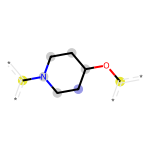

In [23]:
Draw.DrawMorganBit(m,530, bit)

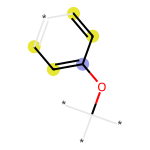

In [24]:
Draw.DrawMorganBit(m,317, bit)

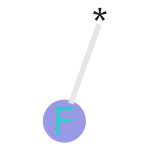

In [25]:
Draw.DrawMorganBit(m,1928, bit)

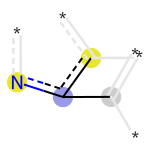

In [18]:
Draw.DrawMorganBit(m,323, bit)